
<h2 style="text-align: center"> 3ème année de Licence de Sciences et Technologies </h2><h2 style="text-align: center"> U.E. Astrophysique - 3PY031-S2 </h2>
<h1 style="text-align: center">Travaux pratiques nocturnes</h1>
<br/><br/>



## Objectifs du TP

* Piloter à distance un télescope et son instrument imageur comme dans un observatoire professionnel; comprendre leur fonctionnement 
* Effectuer des acquisitions d'images scientifiques et d'étalonnage avec les réglages adaptés (choix du filtre, temps de pose,...)
* Etalonner les images (corrections de courant d'obscurité, de champ plat, astrométrie)
* Reconstruire des images composites couleur à partir de poses obtenues à travers des filtres à bande large (L,R,V,B) ou étroite (raies SII à 673nm, Hα à 656,3nm, OIII à 500,7nm)
* Etudier les caractéristiques des nébuleuses en émission; discuter et interpréter les images composites obtenues en séance
* Construire un diagramme HR de l’amas de la Ruche (Messier 44) ou de Messier 67.

In [ ]:
!emacs -nw toto

## Compte-rendu et Barême
Le compte-rendu devra être rendu au plus tard une semaine après la dernière séance de TP. Les points suivants seront attentivement examinés:

* Une introduction personnelle de quelques lignes présentant les sujets que vous abordez dans le TP.
* Les réponses aux questions du TP
* La description des manipulations effectuées
* La présentation des mesures et de leurs éventuelles incertitudes
* Une conclusion précisant les objectifs atteints et les difficultés rencontrées

*Barême indicatif: Introduction: 1 point; questions: 4 points; participation et investissement en séance: 4 points; description/mesure/discussion: 10 points; conclusion: 1 point.*


<img src="https://upload.wikimedia.org/wikipedia/commons/f/f1/Cc-by-nc_euro_icon.svg" width=50pt style="float:left; margin-right:0.5em;"/>
<div style="font-size:0.6em;">     

Ce sujet de TP est mis à disposition selon les termes de la <a url="https://creativecommons.org/licenses/by-nc/4.0/deed.fr">Licence Creative Commons Attribution - Pas d’Utilisation Commerciale 4.0 International</a>:
</div>
<div style="font-size:0.6em; float:left; line-height:1.2em; margin-bottom:0em;">

**Attribution**
Vous devez créditer les auteurs, intégrer un lien vers la licence et indiquer si des modifications ont été effectuées à ce cours. Vous devez indiquer ces informations par tous les moyens raisonnables, sans toutefois suggérer que l'Offrant vous soutient ou soutient la façon dont vous avez utilisé son travail. 

**Pas d’Utilisation Commerciale**
Vous n'êtes pas autorisé à faire un usage commercial de ces notes de cours, tout ou partie du matériel les composant.

**Pas de restrictions complémentaires**
Vous n'êtes pas autorisé à appliquer des conditions légales ou des mesures techniques qui restreindraient légalement autrui à utiliser ces notes de cours dans les conditions décrites par la licence.
</div>

# Introduction

Cette séquence de TP d'astrophysique nous introduit le matériel employé, les différentes montures utilisables et leur fonctionnement, ainsi que l'optique en jeu. Le fonctionnement d'un CCD est étudié, et KStars permet le contrôle à distance du téléscope du professeur. Python et Siril permettent la formation de flat, dark, de light et d'alignement RGB. Enfin, il est proposé une procédure pour la formation d'un diagramme H-R.

# Matériel

## 1. Le télescope

Le télescope est constitué d'une monture équatoriale et d'un tube optique.

<div style="margin-top:1.5em;">
<img src="https://www.10micron.eu/wp-content/uploads/2016/03/GM2000HPS-M-01-1.jpg" width=25% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
La monture équatoriale  (10 Micron) est de type allemande. 
</div>
</div>
<div style="clear:both; margin-top:8em;">
<img src="https://cdn.shopify.com/s/files/1/1935/4371/products/91038-XLT_CGE_Pro_1400_Fastar_4_570x380.jpg" width=25% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
Le tube optique, un Celestron 14 de type Schmidt-Cassegrain, a une distance focale image $F=$ 3,91 m et une ouverture $D=$ 355,6 mm (14 pouces).
</div>
</div>

### Questions

**Q1.1**. Rappelez les avantages et inconvénients respectifs des montures alt-azimutales et équatoriales.

#### Les montures azimutales

#### Aventages : 
Elles ont une bonne stabilité, une simplicité conceptuelle, de mise en oeuvre et de pointage. C'est la monture de prédilection des télescopes pour débutants, et de l'observation de sujets terrestres fixes.

#### Inconvenients :  
Dans sa version non motorisée, elle possède cependant un important inconvénient : il faut pouvoir gérer simultanément deux axes pour suivre le mouvement apparent d'un sujet céleste dû à la rotation de la Terre. Aux forts grossissements (typiquement, ceux utilisés pour observer les planètes) cela peut être problématique pour un débutant (le sujet risque de disparaitre du champ de vision, et il faut alors recommencer la procédure de pointage)... ou tout simplement inconfortable. Et cela interdit toute tentative d'astrophotographie recourant à un suivi manuel, ce qui est à la rigueur encore envisageable avec une monture équatoriale. Dans sa version motorisée, elle possède un inconvénient qui s'en rapproche : contrairement à la monture équatoriale qui ne nécessite qu'un à deux moteurs, elle exige de deux à trois moteurs. 

#### Montures équatoriales

#### Aventages : 

Elle est plus adaptée au suivi du mouvement apparent du ciel.

#### Inconvénients : 

Elle est plus lourde, plus complexe à réaliser, à mettre en place. Elles ne permettent pas l'acquisition d'images longue pose du ciel profond.

Source : Wikipedia

**Q1.2**. Quels sont les principales conséquences de l'obstruction centrale dans un télescope à miroir ?

Dans un télescope astronomique, l'obstruction centrale est la surface centrale du miroir primaire qui n'est pas utilisable à cause de la présence du miroir secondaire au-dessus de lui. En d'autres termes, c'est la projection de la surface du miroir secondaire sur le primaire. Elle s'exprime en pourcentage du diamètre du miroir primaire de l'instrument. Plus elle est importante et moins les images seront contrastées et lumineuses. 

Source : Wikipedia

**Q1.3**. Dans ce qui suit, on supposera que le télescope se comporte comme une lentille mince unique de diamètre $D$ et de distance focale image $F$. Montrer que dans l'approximation des petits angles, le flux reçu sur le plan focal (par unité de surface) d'un objet étendu de radiance donnée (le ciel, la lune, une nébuleuse, ...) ne dépend que du rapport focale-sur-diamètre $F$/$D$.

On simplifie le téléscope en remplacant le miroir par une lentille (Figure 1).

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/0jsRDWS/figure1.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 1 : Schéma optique du téléscope

On a :
    
\begin{align}
\Delta{x} = \Delta{\theta} F 
\end{align}

et 

\begin{align}
\Delta{S} \propto \Delta{x^2} \propto F^2 
\end{align}

À diamètre fixé, la brillance de surface varie en $F^2$. On conserve le flux mais pas la brillance de surface. À focale donnée, si on augmente $D$, on recoit plus de photons, variant en $D^2$. Ainsi, le flux est $\propto F/D$.

**Q1.4**. Calculer le rapport $F/D$ du télescope. Comparer à celui de l'œil humain en conditions nocturnes ($F=$ 22 mm, $D=$ 6,5 mm). De votre rétine ou du plan focal du télescope, lequel reçoit le plus de photons visibles par unité de surface en observant le ciel parisien?

Le tube optique, un Celestron 14 de type Schmidt-Cassegrain, a une distance focale image $F_{celestron}$= 3,91 m et une ouverture $D_{celestron}$= 355,6 mm (14 pouces). On a donc $F_{celestron}/D_{celestron} = 3.91/355.6 = 0.0110$, tandis que $F_{oeil}/D_{oeil}=22/6.5=3.4$. Le plan focal du téléscope recoit beaucoup plus de photons que notre oeil.

**Q1.5**. Toujours dans l'approximation des petits angles, montrer à l'aide de la formule de Descartes qu'un objet lumineux ponctuel, situé à un distance $L$ du télescope focalisé à l'infini, produit une tâche de [bokeh](https://fr.wikipedia.org/wiki/Bokeh) de diamètre angulaire apparent $D/L$.

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/Jrs4P3d/figure2.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 2 : Schéma optique pour une tâche de bokey

Imaginons que de la lumière soit émise vers l’objectif à partir d’un point $P$ qui n’est pas dans le plan focal (Figure 2). Pour simplifier le schéma nous supposerons que P est sur l’axe optique mais cela ne change rien. Appelons $O$ le centre optique de l’objectif, $d_1$ la distance de $O$ au plan focal et $d_2$ la distance de $O$ à $P$. Soit un rayon lumineux partant de $P$ et qui passe par l’ouverture de l’objectif. Appelons $F$ le point d’intersection de ce rayon avec le plan focal, et $\alpha$ l’angle entre $[OF]$ et l’axe optique. Ce rayon aurait très bien pu être émis par une source lumineuse placée en $F$, or comme $F$ est sur le plan focal, tout rayon passant par $F$ et traversant l’objectif reconvergera sur le capteur en un même point $F’$, et en particulier le rayon $[PF]$ arrivera au même point $F’$ que le rayon $[OF]$. Or ce dernier n’est pas dévié par l’objectif (car il passe par le centre optique $O$) donc l’angle entre $[OF’]$ et l’axe optique sera $\alpha$. En d’autres termes, on aura l’impression de voir le point $F$ illuminé sur la photo. En appliquant le même raisonnement à tous les points d’intersection $F$ possibles sous la condition que le rayon arrive dans l’ouverture de l’objectif (dont l’ensemble et la surface de l’ouverture de l’objectif ramené dans le plan focal par une homothétie de centre $P$), on peut voir que l’image de $P$ sur la photo sera la forme de l’ouverture de l’objectif multiplié par un facteur $\frac{d_2-d_1}{d_2}$. Si l’ouverture est un disque de rayon $r$, l’image de $P$ sera vue comme un disque de rayon $h=r.\frac{d_2-d_1}{d_2}$ dans le plan focal, donc il sera vu sous un angle $2\alpha$ depuis $O$, avec:

\begin{align}
\tan{\alpha} = r \frac{d_2 - d_1}{d_1 d_2} 
\end{align}

Or ici, $d_1$ << $d_2$, alors : 

\begin{align}
\tan{\alpha} = r \frac{d_2}{d_1 d_2} = \frac{r}{d_1} 
\end{align}

Soit, avec l'approximation des petits angles : 

\begin{align}
\tan{\alpha} = \alpha = \frac{D}{L} 
\end{align}

en utilisant les paramètres de l'énoncé.

Source : http://comprendre-et-faire.fr/blog/?p=52

**Q1.6**. En dessous de quelle distance un objet sera-t-il vu défocalisé (on considérera qu'une image est défocalisée lorsque le diamètre angulaire apparent de la tâche de bokeh dépasse 2 secondes)?

Rappelons qu'on a : $D_{celestron}$= 355,6 mm et $L=\frac{D}{\alpha}$. 2 secondes d'arc = $1.10^{-5}$ radians. Ainsi, $L_{max} = 4.10^4$ mètres.

## 2. La caméra

<div style="margin-top:1.5em; margin-bottom:8em;">
<img src="https://www.atik-cameras.com/wp-content/uploads/2014/08/AtikOne-Kit-front1-228x300.jpg" width=25% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
La caméra CCD (Charge Coupled Device) Atik One que vous allez utiliser est un détecteur électronique spécialisé dans l’imagerie astronomique, de grande sensibilité.
</div>
</div>

### Capteurs CCD
Les caméras CCD actuelles ont un rendement quantique (pourcentage des photons incidents détectés) supérieur à 80% sur une large portion du domaine visible, et sont linéaires sur toute leur plage dynamique de $2^{16}$ niveaux d’intensité (16 bits); le signal est proportionnel au nombre de photons incidents sur chaque pixel.
Les capteurs CCD équipaient auparavant la majorité des caméras électroniques; ils sont désormais remplacés dans la plupart des applications par des CIS (CIS, pour CMOS Image Sensor), dont les pixels sont chacun équipés de leur amplificateur, et qui peuvent être lus en parallèle ligne-à-ligne.
Cependant, la plus grande homogénéïté et la meilleure sensibilité en proche infrarouge des pixels des capteurs CCD leur assurent toujours une position de "niche" pour certaines applications scientifiques telle que l'astronomie.

### Structure du détecteur

Le capteur d’une caméra CCD est constitué d’une mosaı̈que de photosites en silicium. 
Lorsqu’un photon percute un photosite, il est converti en électrons par effet photoélectrique.
Les électrons sont stockés dans le photosite jusqu’à la lecture de l’image, pendant laquelle les photosites sont déchargés et les électrons comptés.
Le fichier image correspond donc au nombre d’électrons reçus par photosite.
La caméra utilisée pour le TP contient 3326$\times$ 2504 pixels de 5,4μm de côté.


### Questions

**Q2.1**. Que vaut l'espérance mathématique $\mu_e$ et la variance $\sigma_e^2$ d'une variable aléatoire de loi de Poisson de paramètre $\lambda$?

$\mu_e$=$\sigma_e^2$=$\lambda$

**Q2.2**. En supposant que le nombre de photons détectés par pixel suit une loi de Poisson, montrer que la variance du nombre d'ADU par pixel $\sigma_F^2$ augmente proportionnellement au flux moyen en ADU $\mu_F$ avec le facteur $1/g$.

On a $I_F=\frac{I_e}{g}$ soit $\sigma_F=\frac{\sigma_e}{g}$ soit $\sigma_F^2=\frac{\sigma_e^2}{g^2}$ or $\sigma_e^2=\mu_e$ donc $\sigma_F^2=\frac{\mu_e}{g^2}$ or $\mu_F=\frac{\mu_e}{g}$ soit $\mu_e=\mu_F . g$ donc $\sigma_F^2=\frac{\mu_F}{g}$

**Q2.3**. Pour estimer $1/g$ et donc $g$, on va acquérir des paires de poses dans un filtre large avec un temps de pose croissant.
La seconde image de chaque paire sera soustraite de la première pour éliminer les variations systématiques d'intensité lumineuse sur le détecteur, et l'on supposera que tous les pixels se comportent de manière identique et indépendantes.
Tracer $2\times\sigma_F^2$ en fonction de $\mu_F$, en déduire la pente $1/g$, et donc $g$ en $e^{-}/$ADU (une précision de quelques pourcents suffit).

On commence par les dark qu'on se donne la posibilité de soustraire au flat.

In [138]:
import glob
import numpy as np
import astropy.io.fits as fits

#%run mydefs.ipynb

darks=[]
darklist=glob.glob("2020-04-22/Dark/*")

for darkname in darklist:
    dark=fits.getdata(darkname).astype(np.float32)
    darks.append(dark)

#print(darklist)


In [139]:
masterdark=np.median(np.stack(darks,axis=2),axis=2)

In [140]:
#print(masterdark.shape)
fits.writeto("g/dark/masterdark.fits",masterdark,overwrite=True)

Travaillons à présent sur les flats (nous n'avons hélas que des pauses d'une seconde, ainsi on travaille sur des flats pris à plusieurs secondes d'intervalles pour les paires, le ciel s'assombrissant au fil des pauses, on dispose ainsi de defférentes intensités lumineuses) auxquels on se donne la possibilité de soustraire le masterdark. On décide de ne pas le faire en principe afin de garder des images brutes.

In [141]:
flats=[]
flatlist=glob.glob("2020-04-22/Flat/Light/*")

for flatname in flatlist:
    flat=fits.getdata(flatname).astype(np.float32)
    flats.append(flat)

In [159]:
    
flat1=flats[0]#-masterdark
flat2=flats[1]#-masterdark
flat3=flats[28]#-masterdark
flat4=flats[29]#-masterdark

Formons $2\sigma_F^2$ et $\mu_F$ à l'aide des fonctions var et average de numpy.

In [177]:
#pair1=flat1-flat2
#pair2=flat3-flat4

#variance_pair1=np.var(pair1)
#variance_pair2=np.var(pair2)

variance_pair1=np.var(flat1-flat2)
variance_pair2=np.var(flat3-flat4)

two_sigmaf2=[2*variance_pair1,2*variance_pair2]

#average_pair1=np.average(pair1)
#average_pair2=np.average(pair2)

average_pair1=np.average(flat1+flat2)
average_pair2=np.average(flat3+flat4)

mu_F=[average_pair1,average_pair2]

Tracons.

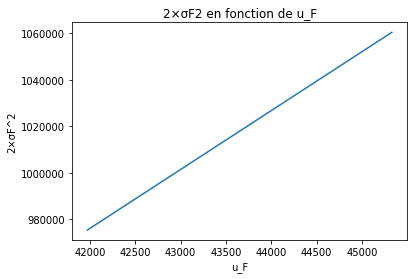

<Figure size 432x288 with 0 Axes>

In [178]:
import matplotlib.pyplot as plt
plt.plot(mu_F,two_sigmaf2)
plt.ylabel('2×σF^2')
plt.xlabel('u_F')
plt.title('2×σF2 en fonction de u_F')
plt.show()
plt.savefig('g/plot.png')

On a des paires de 2 pauses. Pour pourvoir à ce moyennage, g devra donc être multiplié par 2.

In [180]:
coeff = np.polyfit(mu_F,two_sigmaf2, 1)

a=coeff[0]
g=2/(coeff[0])
print('Grâce à un fit linéaire, on obtient un coefficient directeur 2/g = ',a,', soit le gain g est ainsi égal à : ',2*g,'e-/ADU')

Grâce à un fit linéaire, on obtient un coefficient directeur 2/g =  25.295106238711117 , soit le gain g est ainsi égal à :  0.15813335442246457 e-/ADU


g devrait plutôt se trouver autour de 0.4 e-/ADU.

## 3. Traitement des images

Avant de pouvoir être exploitée scientifiquement, les images produites par le CCD doivent subir quelques traitements réalisés à l’aide d’un logiciel spécialisé.

### Questions

Le premier traitement consiste en la correction du courant d’obscurité (*dark current* en anglais).

**Q3.1**. Rechercher quelques informations sur le courant d’obscurité. Est-ce un signal reproductible d’une prise de vue à l’autre ?

Le courant d'obscurité (dark current en anglais) est le courant électrique résiduel d'un photodétecteur en l'absence d'éclairement lumineux. Par opposition, le courant résultant de cet éclairement lumineux est appelé photocourant.

Le courant d'obscurité est l'une des sources principales de bruit dans les capteurs photographiques tels que les dispositifs à transfert de charge (CCD).

Le courant d'obscurité s'exprime en densité de courant $[A/m^2]$ ou en électron/pixel/seconde.

Source : https://fr.wikipedia.org/wiki/Courant_d%27obscurit%C3%A9

**Q3.2**. Justifiez le fait que l’acquisition du courant d’obscurité avec la caméra CCD doive se faire obturateur fermé, à température identique à la température de prise de vue, et durant le même temps de pose.

L'obturateur doit être fermé afin qu'on ne capture que le bruit thermique résultant de l'échauffement du capteur qui survient pendant les prises longues (1 seconde et plus). Le ciel, imparfaitement noir, pourrait échauffer le capteur. On souhaite maintenir une température identique lors de la prise de vue et du dark afin que les photosites soient dans les mêmes conditions d'échauffement. C'est notament pour cela qu'on les fait à la fin de la prise de vue. Enfin, le temps de pose doit être le même car plus il est long, plus les photosites peuvent s'échauffer.

Sources : https://books.google.fr/books?id=MhDPDwAAQBAJ&pg=PA81&lpg=PA81&dq=dark+pourquoi+fermer+l%27obturateur&source=bl&ots=1B5bLDfOQN&sig=ACfU3U3S0n7Ja1V55c_qU4BdyKU_8AsVug&hl=en&sa=X&ved=2ahUKEwjRoIH995DpAhWkDGMBHYk3D1wQ6AEwAHoECAcQAQ#v=onepage&q=dark%20pourquoi%20fermer%20l'obturateur&f=false
 
https://free-astro.org/index.php/Siril:Tutorial_preprocessing

Le deuxième prétraitement correspond à la correction des défauts d’uniformité de l’image. Ces
derniers peuvent venir du vignettage du système optique (le bord de l’image est moins éclairé que le centre) ou de poussières présentes sur le capteur.
Ces défauts peuvent êtres mesurés en effectuant une plage de lumière uniforme (PLU, ou *flat field* en anglais), c.-à.-d. une image CCD d’un fond uniformément éclairé.

**Q3.3**. Si l'on appelle $\boldsymbol{O}$ le signal de l’objet astronomique observé, $\boldsymbol{C}$ l’image du courant d’obscurité et $\boldsymbol{P}$ la PLU, justifiez que l’opération arithmétique à effectuer lors du prétraitement pour obtenir l’image $\boldsymbol{I}$ de l’objet soit:

$$\boldsymbol{I} = (\boldsymbol{O} - \boldsymbol{C})/\boldsymbol{P},$$

où le symbole $/$ représente ici l'opération de division pixel par pixel.

Il faut réaliser l'opération suivante : $calibratedImage=\frac{light-masterDark-masterBias}{masterFlat-masterFlatDark-masterBias}$

On soustrait à notre light le bias (bruit électronique dans la caméra) ainsi que le dark. Enfin, selon les termes de free-astro.org : "Telescopes usually do not illuminate the detector homogeneously. Moreover, dust on optical surfaces and sensor lead to darker patterns on resulting image, and the sensor itself has a different response to the number of photons hitting different photosites. To correct these effects one need to divide each light images by the master flat, which should be the median of single exposures of a homogeneously and non-saturating illuminated area.". On soustrait le bias à ce flat.

Source : https://free-astro.org/index.php/Siril:Tutorial_preprocessing

# Observations

Le pointage, la mise-au-point et l'acquisition de données se font à l'aide du logiciel libre [KStars](https://edu.kde.org/kstars/) et de son module [Ekos](https://www.indilib.org/about/ekos.html).
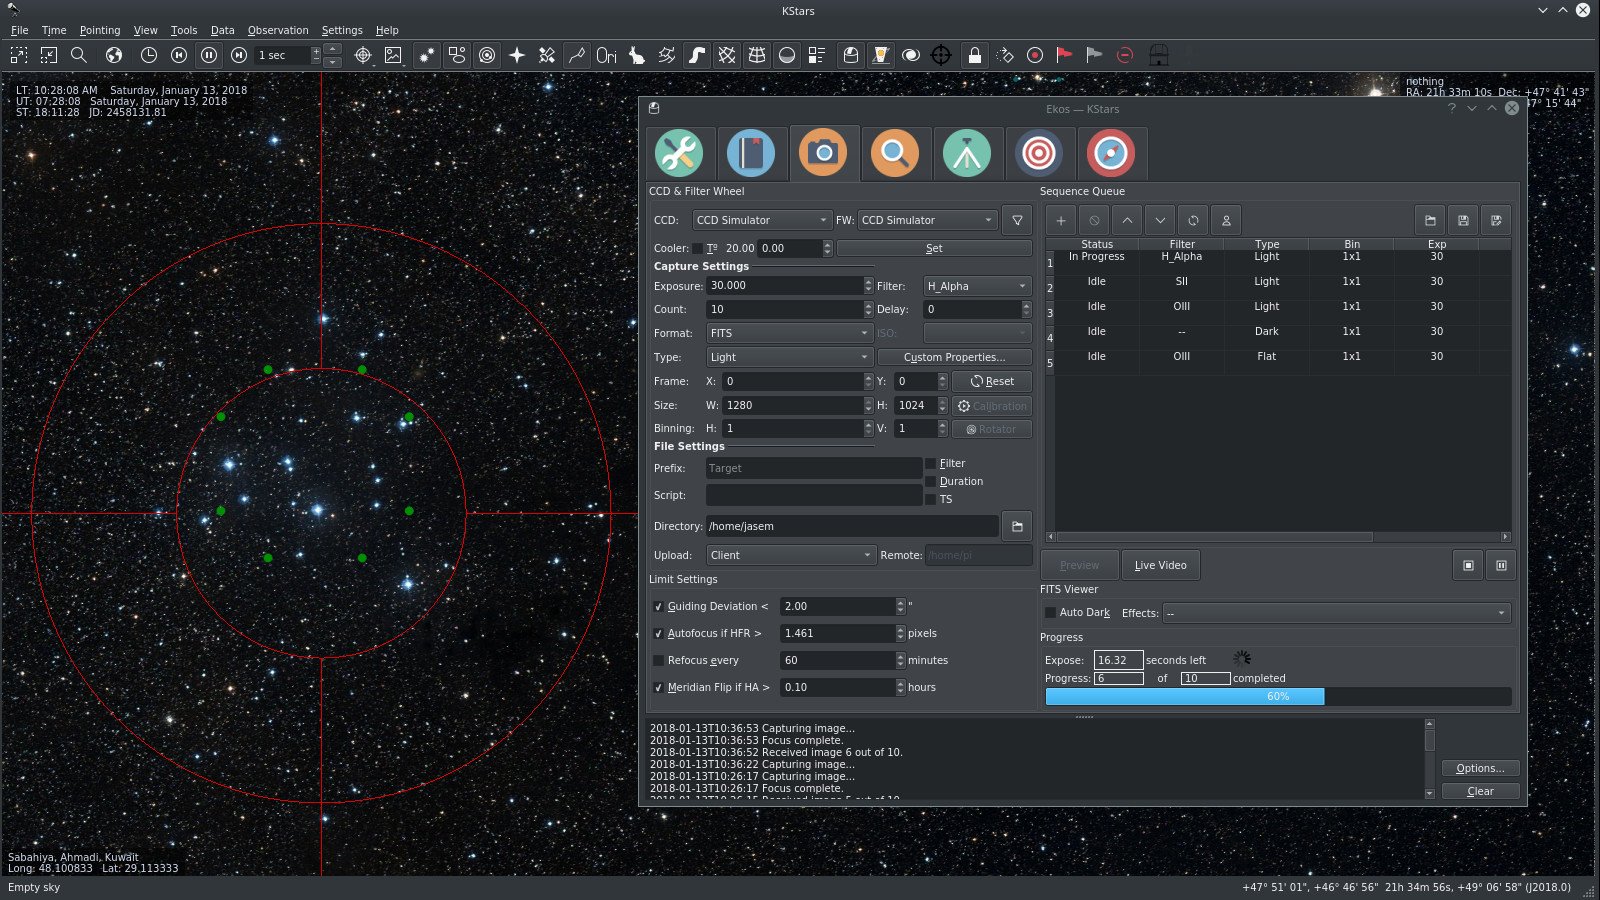

La caméra CCD, la roue à filtre, la crémaillère de mise-au-point et la monture du télescope sont toutes connectées par connexion USB à un ordinateur portable tournant sous Linux.
Ce dernier, placé à proximité du télescope, lui-même sur le toit de la tour 24, est relié au sous-réseau informatique de la licence de physique sous le nom `telescope1`, par un câble ethernet.
Le portable `telescope1` est muni de tous les pilotes nécessaires pour contrôler les différents sous-systèmes; il reçoit les instructions transmises par le module Ekos depuis n'importe quel ordinateur connecté au sous-réseau, et renvoit les données et meta-données des observations.

## 4.  Imagerie en bande étroite: Nébuleuses en émission

De manière générale, les nébuleuses en émission sont constituées de nuages de gaz ionisé, par exemple
par la présence d’étoile(s) émettrices des rayons UV à proximité.
Elles sont principalement consituées d’hydrogène même si leur composition est variable.
La raie d’émission principale dans le spectre visible de la plupart des nébuleuses correspond à la transition du niveau $n = 3$ au niveau $n = 2$ de l’hydrogène neutre. Elle est appelée raie H$\alpha$ et se situe dans le rouge à 656~nm de longueur d'onde.
Le spectre complet d’une nébuleuse à émission se compose de plusieurs raies correspondant aux diverses transitions possibles pour les élements présents dans le nuage:

<div style="font-size:0.6em; text-align:center; margin-top:1em; margin-bottom:1em">     
Spectre en visible de la grande nébuleuse d'Orion, M42 <a href="http://www.astrosurf.com/buil/nebula/HII/m42/m42.html">d'après C.Buil, AstroSurf</a>.
</div>


### Question

**Q4.1**.  Les types principaux de nébuleuses sont: régions HII, nébuleuses planétaires, vestiges de supernova.
Cherchez des informations (succintes) sur leurs caractéristiques principales (formation, composition, caractéristiques spectrales dans le domaine visible).

***régions HII***
 
Formation : Le précurseur d'une région HII est un nuage moléculaire géant. Les nuages moléculaires géants peuvent rester dans un état stable pendant très longtemps, mais les ondes de choc provoquées par les supernovæ voisines, les collisions entre galaxies ou les interactions gravitationnelles et magnétiques peuvent entraîner l'effondrement d'une partie du nuage, ce qui conduit à la formation d'étoiles via un processus d'effondrement et de fragmentation du nuage
 
Composition : Ce nuage géant est très froid (de 10 à 20 K) et dense, principalement constitué d'hydrogène moléculaire. Les régions HII tirent leur nom de la présence en grande quantité d'hydrogène ionisé, noté HII, à ne pas confondre avec l'hydrogène moléculaire (H2), et l'hydrogène neutre atomique (HI). En astronomie, la notation HII correspond à l'ion H+. 
 
Caractéristiques spéctrales dans le domaine visible : Chimiquement, les régions HII sont constituées à 90 % d'hydrogène. La raie d'émission la plus forte de l'hydrogène située à 656,3 nm procure à ces régions leur couleur rouge caractéristique. Le reste est principalement constitué d'hélium, plus quelques traces d'éléments plus lourds.
 
Source : https://fr.wikipedia.org/wiki/R%C3%A9gion_HII

***nébuleuses planétaires***
 
Formation : Les nébuleuses planétaires sont le résultat de l'évolution des étoiles de masse intermédiaire (entre 0,8 et 8 fois la masse du Soleil). Après avoir passé une dizaine de milliards d'années à transformer de l'hydrogène en hélium en leur cœur, ces étoiles arrivent à la fin de leur réserve d'hydrogène et n'ont donc plus de quoi produire l'énergie nécessaire pour contrebalancer la force gravitationnelle qui tend à les faire s'effondrer sur elles-mêmes. Le noyau de l'étoile s'effondre lentement, augmentant sa température (de quelques dizaines à une centaine de millions de kelvins), de nouvelles fusions ont alors lieu, l'hélium se transformant en carbone. Les couches externes de l'étoile subissent alors une forte pression et sont expulsées sous forme d'un vent assez lent et dense.

L'étoile devient une géante rouge, et sa température de surface décroît5. L'étoile se compose alors de deux parties : l'étoile proprement dite au centre, qui peu à peu évolue vers une naine blanche, entourée d'une nébuleuse en expansion. On suppose une deuxième phase de vent, cette fois rapide et peu dense, qui compresse la première enveloppe éjectée et lui donne sa forme et sa structure de coquille assez fine.

L'étoile au centre continue sa contraction au fur et à mesure que de la matière est éjectée et sa température de surface augmente jusqu'à passer au-dessus de 30 000 K. À partir de cette température, elle émet une quantité appréciable de photons capables de photoioniser la nébuleuse qui l'entoure. Les photons doivent avoir une énergie supérieure à 13,6 eV, ou 1 Ry, ou encore une longueur d'onde inférieure à 91,2 nm6. En effet, pour « voir » la nébuleuse planétaire, il faut qu'elle émette de la lumière, ce qu'elle fait dès qu'elle est photoionisée par l'étoile centrale. 
 
Composition : Elle contient de l'hydrogène et de l'oxygène doublement ionisé.
 
Caractéristiques spéctrales dans le domaine visible : Pour confirmer la nature d’une candidate, il faut réaliser son spectre et mettre en évidence une signature spectrale caractéristique : les raies $[OIII]$ 4959-5007A et Hα doivent être en émission. D’autres paramètres rentrent en ligne de compte comme le rapport des deux raies $[OIII]$ 4959A et $[OIII]$ 5007A. Certaines autres raies peuvent également être en émission comme les raies Hβ, $[OI]$, HeI, HeII, $[SII]$, $[NII]$.
 
Sources : https://www.shelyak.com/confirmation-de-nebuleuses-planetaires/ & https://fr.wikipedia.org/wiki/N%C3%A9buleuse_plan%C3%A9taire
 
***vestiges de supernova***
 
Formation : Un rémanent de supernova est la matière éjectée lors de l'explosion d'une étoile en supernova. Il existe deux voies possibles qui aboutissent à la création d'un rémanent :

- une étoile massive cessant de générer de l'énergie par l'intermédiaire de la fusion nucléaire dans son cœur, et finissant par s'effondrer sous l'effet de sa propre pesanteur. On parle de supernova à effondrement de cœur, au centre duquel se trouve un résidu compact (étoile à neutrons ou trou noir). Alors que l'étoile massive fait plus de 8 masses solaires, le résidu compact fait de l'ordre de 1,5 masse solaire ;
- une naine blanche ayant accumulé assez de matière provenant d'une étoile voisine ou entrant en collision avec celle-ci pour atteindre la masse critique qui engendre une explosion thermonucléaire. On parle de supernova thermonucléaire. Dans le cas où il y a accrétion de matière et non collision, l'étoile compagnon peut éventuellement survivre à l'explosion. L'étoile qui explose est en revanche totalement détruite, sans laisser de résidu compact derrière elle.
 
Composition : Hydrogène ionisé et oxgène ionisé.
 
Caractéristiques spéctrales dans le domaine visible : Les supernovae sont subdivisés en deux grandes catégories en fonction de leur profil spectral : le Type I et le Type II caractérisées respectivement par l'absence et la présence d'hydrogène dans leur atmosphère (leur spectre). Ces deux types sont eux-mêmes subdivisés en fonction de la masse de l'étoile, de la composition de son enveloppe, de sa température et du profil du pic de brillance en types Ia, Ib, Ic, IIb, IIL et IIP.
 
Sources : https://fr.wikipedia.org/wiki/R%C3%A9manent_de_supernova & http://www.astrosurf.com/luxorion/diversite-etoiles4.htm 

### La grande nébuleuse d'Orion

La nébuleuse M42 (dans le catalogue de Messier) est une vaste région HII, visible à l’œil nu, située dans la constellation d’Orion.
Son diamètre apparent est d'environ un degré, et sa magnitude apparente visuelle de 4,0.
Sa distance a été estimée à environ 410pc.
Les coordonnées équatoriales de M42 sont:

Objet | $\alpha$ (J2000) | $\delta$ (J2000)
--- | --- | ---
M42 | 05:35:17 | -05:23:28

Les filtres utilisés permettent de sélectionner un intervalle étroit, de l'ordre de 5nm, autour des longueurs d'onde associées aux raies les plus intenses des nébuleuses en émission: les raies OIII de l'oxygène deux fois ionisé à 495,9 et 500,7nm, la raie H$\alpha$ de l'hydrogène neutre à 656,3nm, et le doublet SII autour de 673nm.
Lors de cette séance une image en fausses couleurs d’une nébuleuse en émission sera réalisée en associant l’image SII à la couleur rouge, l’image H$\alpha$ à la couleur verte et l’image OIII à la couleur bleue.

### Questions

**Q4.2**. Expliquez pourquoi cette méthode est particulièrement adéquate pour les nébuleuses en émission. 

Les nébuleuses en émission émettent principalement dans 3 bandes étroites du spectre électromagnétique visible. 3 filtres de bande passantes de 5nm permettent ainsi d'acquérir séparement les raies OIII, H$\alpha$ et SII. On peut ensuite superposer les images et associer des couleurs à des émissions de gaz spécifiques.

Sources : http://www.astrosurf.com/buil/nebula/HII/m42/m42.html & http://www.astronoo.com/fr/nebuleuses.html

**Q4.3**. Quel est l’intérêt physique d’une telle image en fausses couleurs ? En quoi ce type d’imagerie est-il adapté à la prise de vue en milieu urbain ?

En milieu urbain, nous avons, hélas, de la lumière parasite due aux lampadaires sur les routes, etc. Réduire le spectre étudié permet de cibler certaines longueurs d'ondes qui nous interessent et d'écarter celles potentiellement parasitées. Cependant, une émission faible dans une bande passante risque d'être invisibilisée par les autres.

Source: https://openclassrooms.com/forum/sujet/fausse-couleur-des-etoiles-84928

### Manipulation

**M4.1**. Effectuer une dizaine de poses sur Messier 42 pour chacun des filtres H$\alpha$, SII et OIII, avec un temps de pose de quelques dizaines de secondes chacune, en expliquant les avantages et inconvénients de multiplier les prises de vue.

**M4.2**. Si nécessaire, effectuer les différentes acquisitions de prétraitement : courant d’obscurité (dark), flat, en nombre suffisant.

**M4.3**. Pour chacun des filtres, effectuer la séquence de prétraitement (**Q3.3**) à l’aide du logiciel libre [Siril](https://www.siril.org/), ou d'un script Python de votre conception (bibliothèques [Numpy](https://www.numpy.org/) et  [AstroPy](https://www.astropy.org/)).

**M4.4**. Combiner les trois images en trichromie et commenter l’image obtenue.

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/fdJbc88/figure3.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 3 : Combination en trichromie de Messier42

On remarque (Figure 3) la présence de OIII au centre de M42 (en bleu), puis une quantité importante de H$\alpha$ (en vert), diffusée notament à l'extérieur du nuage, et enfin, en quantité moins importante, du SII (en rouge) au niveau des étoiles et du centre de M42. La nébuleuse est géométriquement constitutée de 2 bulbes fragmentés, l'un de taille nettement plus grande que l'autre, se faisant face, avec au coeur du plus grand un cluster d'étoiles.

## 5. Diagramme Hertzsprung-Russel de l’amas de la Ruche (Messier 44) et Messier 67

L’amas de la Ruche est un amas ouvert situé à une distance de 580 années-lumières du Soleil, et couvre sur le ciel un diamètre apparent de 95 minutes d'angle.
Ses coordonnées équatoriales sont:

Objet | $\alpha$ (J2000) | $\delta$ (J2000)
--- | --- | ---
M44 | 08:40:24 | +19:59:00


**Q5.1**. Donner la taille de l’amas en parsecs.

On a $D$ la distance entre l'amas de la ruche et le Soleil, $\theta$ l'angle couvert dans le ciel par l'amas et $d$ son diamètre. On a $\tan{\theta}=\frac{d}{D}$ soit $d=D\tan{\theta}$=15 al = 4.6 parsecs, ce qui est cohérent avec l'information fournie par Wikipedia.

Source : https://fr.wikipedia.org/wiki/M44

**Q5.2**. L’étoile $\epsilon$-Cancer de magnitudes bleue et visuelle $m_B = 6,47$ et $m_V = 6,30$ est située dans la zone de l’amas.
Calculer la magnitude absolue de Epsilon du Cancer si elle se situe effectivement dans l’amas ouvert.

Rappelons la formule reliant la magnitude relative à la magnitude absolue : $M=m_V-5\log_{10}{d_{pc}}+5$, avec $M$ la magnitude absolute, $m$ la magnitude apparente, et $d_{pc}$ la distance à l'objet en parsecs. On trouve M=0.0479.

### Manipulation

**M5.1**. On veut mesurer les magnitudes B et V grâce à la caméra CCD.
Prendre une série de photos du champ stellaire de M44: une photo avec filtre B et une avec filtre V pour chacun des temps de pose suivant : 1s, 2s, 4s, 8s, 16s, 32s. Prétraiter les images.

**M5.2**. Mesurer le flux d'ouverture et son incertitude pour un temps de pause fixé pour l’étoile $\epsilon$-Cancer avec le logiciel [SExtractor](https://astromatic.net/software/sextractor), installé sur les machines du TP.
En déduire les point-zéros en magnitudes des observations pour un temps de pose donné dans les filtres B et en V.

**M5.3**. Mesurer le flux d'ouverture des étoiles du champ dans les filtres B et V, et calculer les magnitudes apparentes corrigées du point-zéro.

**M5.4**. En supposant que toutes les étoiles choisies sont à la distance de M44, calculer leur magnitude absolue en V et B, puis les reporter sur un diagrame $M_{\rm V}$ en fonction de $M_{\rm B} - M_{\rm V}$ (analogue à un diagrame H-R).
Commenter vos résultats.

**M5.5**. Ces mesures pourront être reproduites avec l'amas Messier 67, d'âge différent.
Ses coordonnées équatoriales sont

Objet | $\alpha$ (J2000) | $\delta$ (J2000)
--- | --- | ---
M67 | 08:51:18 | +11:49:00

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/SmhCjp3/figure11.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 4 : Alignement RGB de Messier 67

Sur la figure 4, on visualise Messier 67. 
 
On utilisera un gain de 2.0, comme dans le tutoriel du professeur, cela n'ayant pas besoin d'être parfait. On utilise le filtre 'gauss_3.0_7x7.conv' avec le logiciel SExtract.

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/3B62xdK/figure4.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 5 : Diagramme H-R non calibré

On obtient un diagramme H-R (B-V/V) non calibré au niveau des magnitudes (figure 5). On met les objets les plus brillants vers le haut. Les objets rouges sont plus à droite, les objets bleus sont plus à gauche. Pour la calibration, on choisit une étoile (figure 6) dont on prend la magnitude mesurée et que nous comparons au référentiel de Chevalier, 1991.

Source : http://articles.adsabs.harvard.edu//full/1991A%26AS...90..225C/0000228.000.html

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/wcd18Bf/figure5.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 6 : Choix d'une étoile pour la calibration

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/9h7nPp2/figure6.png" width=30% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 7 : Référentiel de Chevalier, 1991

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/MCn4BTs/figure12.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 8 : Vision du référentiel de Chevalier, 1991, sur notre image RGB

On choisit l'étoile 18c dans le référentiel de Chevalier, 1991 (figure 7) que l'on peut visualiser en contexte dans notre image RGB (figure 8).

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/cFxr44N/figure8.png" width=80% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 9 : Magnitude mesurée par notre instrument pour l'étoile 18 dans le catalogue de Chevalier, 1991

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/4pGMS7f/figure7.png" width=60% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 10 : Magnitude mesurée pour l'étoile 18 dans le catalogue de Chevalier, 1991

On effectue les opérations nécessaires pour calibrer notre B, puis notre V, grâce aux colonnes V et B-V (figure 10) du catalogue de Chevalier, 1991.
 
Pour notre étoile 18, on a V = -11.7876 mag et B = -11.4633 mag
 
Dans le catalogue de Chevalier, 1991, on a V = 12.884 mag et B-V=0.453 mag soit B = 0.453 + V=0.453+12.884=13.337.
 
On doit donc ajouter 24.6716 à notre V et 24.8003 à notre B

Les amas globulaires sont anciens, il datent du début de la galaxie, Messier 67 en particulier, on s'attend donc bien à voir une séquence principale complète (Figure 11). On a un point d'infléxion avec une densité importante. On a un point d'infléxion à des masses faibles et donc des magnitudes absolues importantes.

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/ZM1w9f4/figure13.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 11 : Diagramme H-R avec calibrage

On additionne les déviations standards (car addition) pour B-V (Figure 12). On voit donc que l'étendue en bas de la séquence correspond à des incertitudes improtantes au niveau de B-V. Les étoiles trop en dehors de la séquence ne font peut-être pas parti de Messier 67.

<div style="margin-top:1.5em;">
<img src="https://i.ibb.co/MkcQmsF/figure14.png" width=50% style="float:left; margin-right:0.5em;"/>
<div style="padding-top:5%;">
    
Figure 12 : Diagramme H-R avec calibrage et incertitudes

# Conclusion

Comprendre le fonctionnement d'un téléscope et d'un CCD est important pour le post-processing des images en astrophysique. Une image d'un objet céleste correspond au stacking de pauses dans des filtres laissant passer des longueurs d'ondes spécifiquement choisis pour visualiser les émissions d'éléments chimiques. Ces stacks des différentes couleurs sont ensuite alignés, et les couleurs correspondent aux émissions des différents gaz.
 
Les diagrammes H-R permettent d'observer la séquence principale d'un amas globulaire, par exemple, Messier 67, en l'occurence, et d'en déterminer son âge, notament. En effet, on peut analyser les étoiles de l'objet célèste sur la séquence principale sur un diagramme H-R. Le point d'inflexion dense en étoile de Messier 67 nous permet de conclure que l'objet est très ancien.